# Step 1: Install the scikit-learn library

In [2]:
!pip install scikit-learn


# Step 2: Import libraries

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning modules from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Step 3: Load & Clean the Dataset

In [10]:
import pandas as pd

# Correct the file path
file_path = "/Users/dela/Documents/DataSet happiness reports/DATA/Prepared data/cleaned_2019.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()



,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Step 4: Explore the Data (Scatterplot)

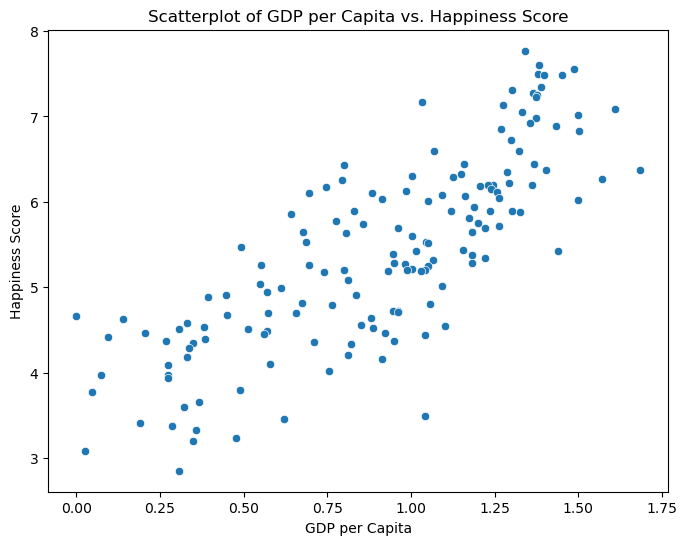

In [12]:
# Scatterplot of GDP per Capita vs. Happiness Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["gdp_per_capita"], y=df["score"])
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Scatterplot of GDP per Capita vs. Happiness Score")
plt.show()


### Hypothesis Statement
Based on the scatterplot visualization from Step 4, there appears to be a **positive correlation** between GDP per Capita and Happiness Score. 

**Hypothesis:** "Higher GDP per capita leads to a higher Happiness Score."

This hypothesis suggests that as a country's GDP per Capita increases, its citizens tend to report higher happiness scores. The linear regression analysis in the following steps will help test whether this relationship is statistically significant.


# Step 6 : Reshaping the Variables into NumPy Arrays

In [14]:
import numpy as np

# Define independent (X) and dependent (y) variables
X = df[['gdp_per_capita']].values  # GDP per Capita as independent variable
y = df[['score']].values  # Happiness Score as dependent variable

# Reshape the variables into NumPy arrays
X = X.reshape(-1, 1)  # Reshaping X to be a 2D array as required by scikit-learn
y = y.reshape(-1, 1)  # Reshaping y to match dimensions

# Display the reshaped arrays
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (156, 1)
y shape: (156, 1)


# Step 7: Splitting the Data into Training and Test Sets

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (109, 1)
X_test shape: (47, 1)
y_train shape: (109, 1)
y_test shape: (47, 1)


# Step 8: Running a Linear Regression on the Data

In [18]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
regression = LinearRegression()

# Train (fit) the model on the training set
regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regression.predict(X_test)

# Display the model's coefficients
print("Intercept (B0):", regression.intercept_[0])
print("Slope (B1):", regression.coef_[0][0])


Intercept (B0): 3.352354099491142
Slope (B1): 2.279318452267882


# Step 9: Creating a Plot That Shows the Regression Line 

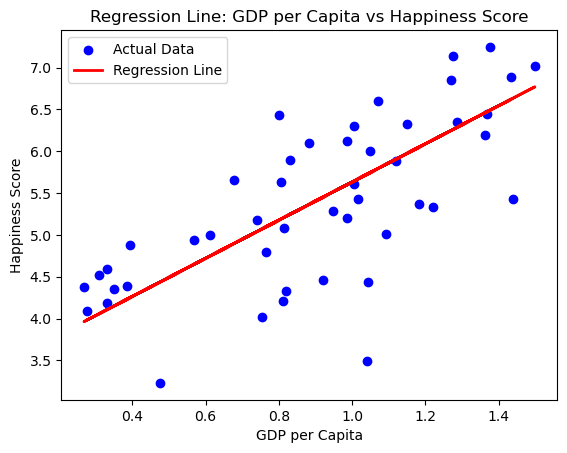

In [20]:
import matplotlib.pyplot as plt

# Plot the test data points
plt.scatter(X_test, y_test, color='blue', label="Actual Data")

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Regression Line: GDP per Capita vs Happiness Score")
plt.legend()

# Show plot
plt.show()


# Step 10: Writing my Interpretation

## Interpretation of the Regression Line  

The regression line represents the relationship between **GDP per Capita** (independent variable) and **Happiness Score** (dependent variable).  

- **General Fit:** The red regression line shows a positive linear trend, meaning that as **GDP per capita increases, the happiness score tends to increase** as well.  
- **Alignment with Data Points:** While the line captures the **general direction** of the data, there is still **some dispersion** of data points around the line, indicating that GDP per capita is not the sole predictor of happiness.  
- **Possible Outliers:** There are some points that deviate **significantly** from the regression line, which suggests that other factors (such as social support, health, and government policies) might also influence happiness scores.  
- **Conclusion:** The model provides a reasonable approximation of the relationship, but additional variables could improve its predictive power.  


# Step 11 : 

In [24]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict y values for the test set
y_pred = regression.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute R-squared value (R2 Score)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("R-squared value (R2 Score):", r2)


Mean Squared Error (MSE): 0.503276198628679
R-squared value (R2 Score): 0.4856732082914146


# Step 12: Compare the predicted y values with the actual y values in a dataframe.

In [30]:
import pandas as pd

# Create a DataFrame comparing actual vs predicted values
comparison_df = pd.DataFrame({'Actual Happiness Score': y_test.flatten(), 'Predicted Happiness Score': y_pred.flatten()})

# Display the first few rows
comparison_df.head()


,Actual Happiness Score,Predicted Happiness Score
0,5.011,5.841370
1,5.603,5.640790
2,5.285,5.513148
3,5.425,5.665862
4,4.587,4.106809


# Step 13 : Thoughts and Observations

### Model Performance Evaluation

The model's performance can be assessed using the Mean Squared Error (MSE) and R-squared (R²) score.

- **MSE**: 0.503, which indicates the average squared difference between the actual and predicted values. A lower MSE is preferable, though this value suggests there are some deviations.
- **R² Score**: 0.486, meaning that approximately **48.6%** of the variation in the Happiness Score is explained by GDP per Capita. This suggests a moderate correlation, but there are other factors influencing happiness that are not accounted for by this model.

#### Observations:
- The regression model **reasonably predicts** happiness scores based on GDP per Capita, but with a **moderate level of accuracy**.
- The **scatterplot and regression line** indicate a trend, but the dispersion of data points around the line shows that other variables likely contribute significantly to happiness.
- The model would likely improve with additional predictors, such as **social support, health expectancy, or freedom of choice**, which were present in the dataset.
- **Potential data bias**: The dataset might not represent all global populations equally, potentially skewing the model’s performance in certain regions.

#### Future Improvements:
- Implement **multiple regression** by including additional predictors.
- Consider **non-linear models** if the relationship isn't purely linear.
- Check for **outliers** or **data quality issues** that may impact predictions.

Overall, while GDP per Capita has a **significant impact** on happiness, it is **not the sole determinant**. A more comprehensive model with multiple factors would likely yield better predictive performance.
